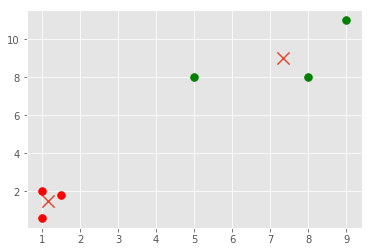

In [27]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import numpy as np
from sklearn.cluster import KMeans

X= np.array([[1,2],
            [1.5,1.8],
            [5,8],
            [8,8],
            [1,0.6],
            [9,11]])

#plt.scatter(X[:,0], X[:,1], s=150)
#plt.show()

clf = KMeans(n_clusters=2)
clf.fit(X)

centroids = clf.cluster_centers_
labels = clf.labels_

colors = 10*["g.","r.","c.","b.","k."]

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 15)
plt.scatter(centroids[:,0],centroids[:,1], marker= 'x', s=150)
plt.show()

In [29]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing, cross_validation
import pandas as pd

df = pd.read_excel('titanic.xls')
#print(df.head())
df.drop(['body', 'name'] , 1, inplace = True)
df.convert_objects(convert_numeric= True)
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):
    coloumns = df.columns.values
    
    for column in columns:
        text_digit_vals = []
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x= 0 
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int,df[column]))
    return df
df = handle_non_numerical_data(df)

#df.drop(['boat'],1,inplace=True)

X = np.array(df.drop(['survived'],1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct+=1
    #labels = clf.labels_
print(correct/len(X))

ImportError: cannot import name 'cross_validation'

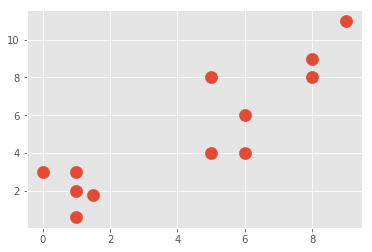

a
490.12345679012344
a
13.0
a
44.760582928521856


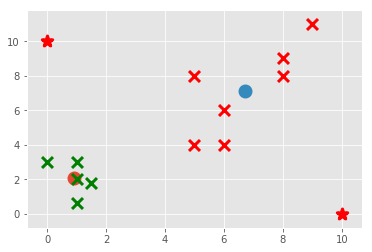

In [66]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import numpy as np

X= np.array([[1,2],
            [1.5,1.8],
            [5,8],
            [8,8],
            [1,0.6],
            [9,11],
            [1,3],
                    [8,9],
                    [0,3],
                    [5,4],
                    [6,4],
                    [6,6]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

colors = 10*["g","r","c.","b.","k."]


class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self, data):
        
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        for i in range(self.max_iter):
            self.classifications ={}
            for i in range(self.k):
                self.classifications[i] = []
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid) / original_centroid * 100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid) / original_centroid * 100.0))
                    optimized = False
            if optimized:
                break
                
    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker='o', s=120,linewidth=3)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color= color, s= 120, linewidth=3)

unknowns = np.array([
                    [10,0],
                     [0,10]])
for unknown in unknowns:
    classification=clf.predict(unknown)
    plt.scatter(unknown[0],unknown[1],marker="*",color=colors[classification],s=120,linewidth=3)
        
plt.show()